In [22]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import regex as re

In [23]:
df = pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [28]:
print("spam count: " +str(len(df.loc[df.spam==1])))
print("not spam count: " +str(len(df.loc[df.spam==0])))
print(df.shape)
df['spam'] = df['spam'].astype(int)

df = df.drop_duplicates()
df = df.reset_index(inplace = False)[['text','spam']]
print(df.shape)


spam count: 1368
not spam count: 4327
(5695, 2)
(5695, 2)


In [32]:
clean_desc = []

for w in range(len(df.text)):

    
    desc = df['text'][w]


    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)


df['text'] = clean_desc

<function matplotlib.pyplot.show(close=None, block=None)>

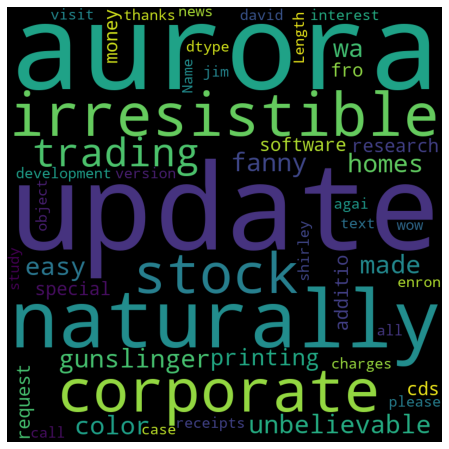

In [37]:
stop_words = 'is you your and the to from or I for do get not here in im have on re subject new'.split(' ')
wordcloud = WordCloud(width=800, height=800, stopwords=stop_words, background_color='black', max_words=1000,
            min_font_size=20)

overall_world_cloud = wordcloud.generate(str(df['text']))

fig = plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(overall_world_cloud)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

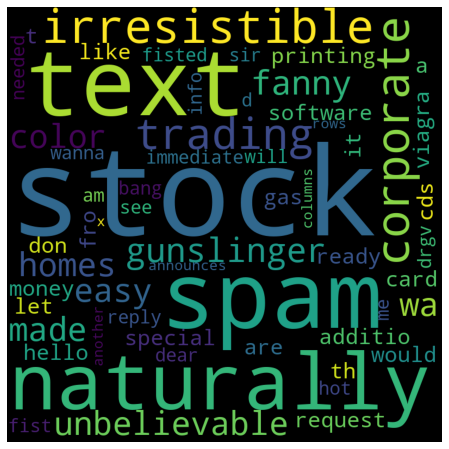

In [44]:
spam_word_cloud = wordcloud.generate(str(df.loc[df.spam==1]))

fig = plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(spam_word_cloud)
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

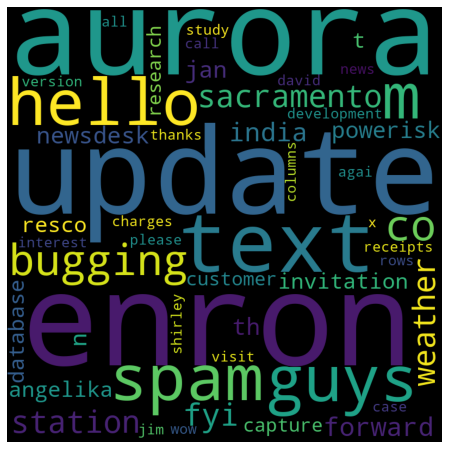

In [45]:
not_spam_word_cloud = wordcloud.generate(str(df.loc[df.spam==0]))
fig = plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(not_spam_word_cloud)
plt.axis("off")
plt.show

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report,accuracy_score

In [47]:
test_vec = CountVectorizer().fit_transform(df['text'])
X_train, X_test, Y_train, Y_test = train_test_split(test_vec, df['spam'], random_state=42, test_size=0.45, shuffle=True)

In [48]:
classifier = ensemble.GradientBoostingClassifier(learning_rate=0.5, max_depth=6)
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1926
           1       0.98      0.89      0.93       637

    accuracy                           0.97      2563
   macro avg       0.97      0.94      0.96      2563
weighted avg       0.97      0.97      0.97      2563



In [49]:
classifier = ensemble.GradientBoostingClassifier(learning_rate=0.1, max_depth=6)
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1926
           1       0.97      0.93      0.95       637

    accuracy                           0.97      2563
   macro avg       0.97      0.96      0.96      2563
weighted avg       0.97      0.97      0.97      2563



In [50]:
classifier = ensemble.GradientBoostingClassifier(learning_rate=0.1, max_depth=10)
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1926
           1       0.95      0.95      0.95       637

    accuracy                           0.97      2563
   macro avg       0.97      0.96      0.97      2563
weighted avg       0.97      0.97      0.97      2563



In [51]:
from sklearn import svm
classifier = svm.SVC()
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1926
           1       0.97      0.73      0.84       637

    accuracy                           0.93      2563
   macro avg       0.95      0.86      0.90      2563
weighted avg       0.93      0.93      0.93      2563



In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)
print(classification_report(Y_test, predictions))


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1926
           1       0.93      0.70      0.80       637

    accuracy                           0.91      2563
   macro avg       0.92      0.84      0.87      2563
weighted avg       0.91      0.91      0.91      2563



In [70]:
from textblob import TextBlob
blob = [TextBlob(text) for text in df['text']]
df['Polarity'] = [b.sentiment.polarity for b in blob]
df['Subjectivity'] = [b.sentiment.subjectivity for b in blob]

In [72]:
df.loc[df.spam==0]

,text,spam,Polarity,Subjectivity
1368,Subject hello guys i m bugging you for your co...,0,0.004470,0.226288
1369,Subject sacramento weather station fyi forward...,0,0.127147,0.379519
1370,Subject from the enron india newsdesk jan th n...,0,0.057353,0.482411
1371,Subject re powerisk your invitation angelika t...,0,0.243325,0.612168
1372,Subject re resco database and customer capture...,0,0.147558,0.496815
...,...,...,...,...
5690,Subject re research and development charges to...,0,-0.033333,0.412500
5691,Subject re receipts from visit jim thanks agai...,0,0.038095,0.195238
5692,Subject re enron case study update wow all on ...,0,0.222143,0.512024
5693,Subject re interest david please call shirley ...,0,0.012308,0.303077
